In [196]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,accuracy_score
import math

In [4]:
df = pd.read_csv("housing_data.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details of the 
# house and its neighborhood.

# It is a regression problem. The number of observations for each class is balanced. There are 506 observations with 
# 13 input variables and 1 output variable. The variable names are as follows:

#     CRIM: per capita crime rate by town.
#     ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
#     INDUS: proportion of nonretail business acres per town.
#     CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
#     NOX: nitric oxides concentration (parts per 10 million).
#     RM: average number of rooms per dwelling.
#     AGE: proportion of owner-occupied units built prior to 1940.
#     DIS: weighted distances to five Boston employment centers.
#     RAD: index of accessibility to radial highways.
#     TAX: full-value property-tax rate per $10,000.
#     PTRATIO: pupil-teacher ratio by town.
#     B: 1000(Bk – 0.63)^2 where Bk is the proportion of blacks by town.
#     LSTAT: % lower status of the population.
#     MEDV: Median value of owner-occupied homes in $1000s.

# The baseline performance of predicting the mean value is an RMSE of approximately 9.21 thousand dollars.

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
#no missing value

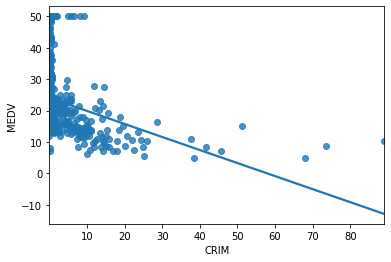

In [8]:
sns.regplot(x="CRIM",y="MEDV",data=df,ci=None)

In [9]:
#lower crime , higher price

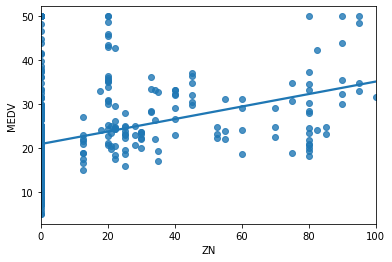

In [10]:
sns.regplot(x="ZN",y="MEDV",data=df,ci=None)

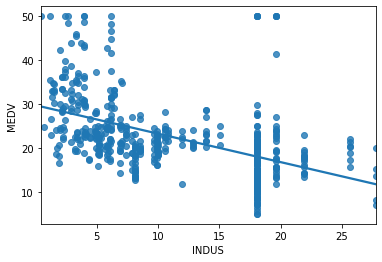

In [11]:
sns.regplot(x="INDUS",y="MEDV",data=df,ci=None)

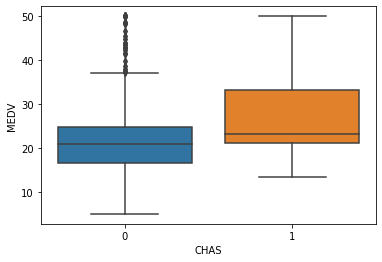

In [12]:
sns.boxplot(x="CHAS",y="MEDV",data = df)

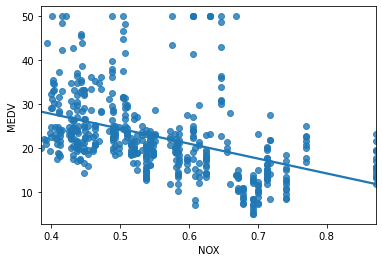

In [13]:
sns.regplot(x="NOX",y="MEDV",data=df,ci=None)

In [14]:
#more the nox , lesser the MEDV

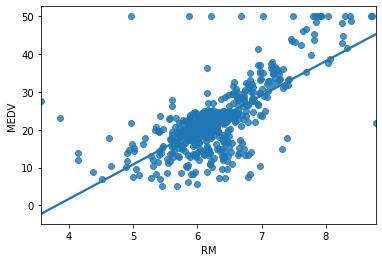

In [15]:
sns.regplot(x="RM",y="MEDV",data=df,ci=None)

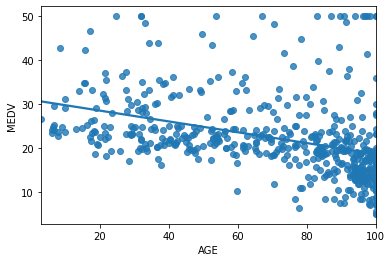

In [16]:
sns.regplot(x="AGE",y="MEDV",data=df,ci=None)

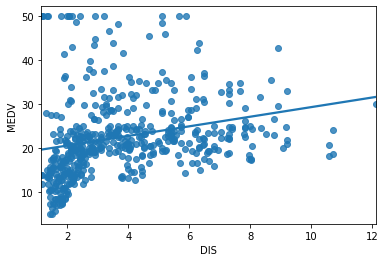

In [17]:
sns.regplot(x="DIS",y="MEDV",data=df,ci=None)

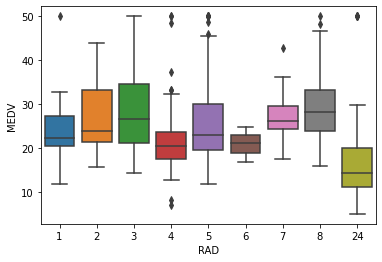

In [18]:
sns.boxplot(x="RAD",y="MEDV",data=df)

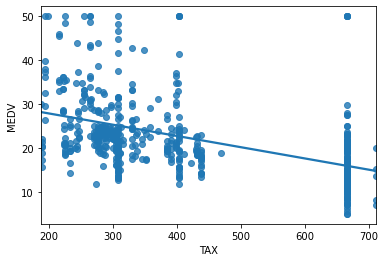

In [19]:
sns.regplot(x="TAX",y="MEDV",data=df,ci=None)

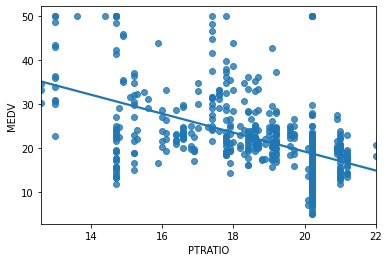

In [20]:
sns.regplot(x="PTRATIO",y="MEDV",data=df,ci=None)

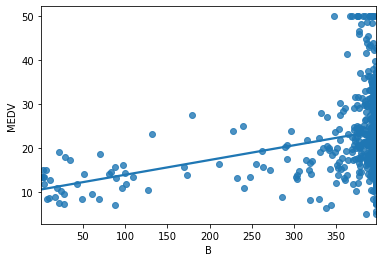

In [21]:
sns.regplot(x="B",y="MEDV",data=df,ci=None)

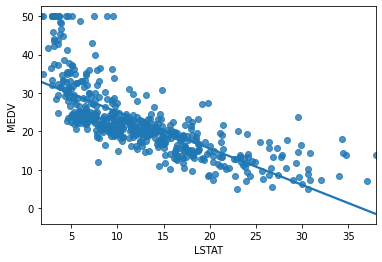

In [22]:
sns.regplot(x="LSTAT",y="MEDV",data=df,ci=None)

In [23]:
#let us first remove the outliers
#all the houses above the medv of 45 are usually outliers in every graph
df = df.loc[df['MEDV'] < 45]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [24]:
df.shape

(484, 14)

In [25]:
#training and testing
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [180]:
from sklearn.svm import SVR
svr = SVR()

In [181]:
parameters = [{'C':[19000,22000],'kernel':['rbf'],'gamma':[0.0001,0.00001,0.000001,0.0000001]}]

In [182]:
svr_grid_search = GridSearchCV(estimator = svr,param_grid = parameters,scoring = 'neg_mean_squared_error')

In [183]:
svr_grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [19000, 22000],
                          'gamma': [0.0001, 1e-05, 1e-06, 1e-07],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [73]:
svr_grid_search.best_params_

{'C': 22000, 'gamma': 1e-05, 'kernel': 'rbf'}

In [74]:
ypred = svr_grid_search.predict(xtest)

In [185]:
svr_mse = mean_squared_error(ytest,ypred)
svr_mse

7.503076104287366

In [189]:
from sklearn.ensemble import RandomForestRegressor

In [190]:
rf = RandomForestRegressor(n_estimators = 90)

In [191]:
rf.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=90, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [192]:
ypred = rf.predict(xtest)

In [193]:
rf_mse = mean_squared_error(ytest,ypred)
rf_mse

6.9009408934707865

In [132]:
from xgboost import XGBRegressor

In [148]:
xgbr = XGBRegressor()

In [170]:
parameters = [{'n_estimators':[400, 500, 600],
               'max_depth':[8,9,10, 11, 12],
               'booster':['gbtree'],
               'learning_rate':[0.075,0.1,0.125],
               'min_child_weight':[1,2,3,4]
               }]

In [171]:
xgbr_grid_search = GridSearchCV(estimator = xgbr,param_grid = parameters,scoring = 'neg_mean_squared_error')

In [172]:
xgbr_grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_est...
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid=[{'booster': ['gbtree'],
                          'learning_rate': [0.075

In [175]:
ypred = xgbr_grid_search.predict(xtest)

In [187]:
xgb_mse = mean_squared_error(ytest,ypred)
xgb_mse

7.503076104287366

In [177]:
xgbr_grid_search.best_params_

{'booster': 'gbtree',
 'learning_rate': 0.125,
 'max_depth': 9,
 'min_child_weight': 4,
 'n_estimators': 500}

In [194]:
print("RMSE SCORE FOR SVM = ",math.sqrt(svr_mse))
print("RMSE SCORE FOR XGBOOST = ",math.sqrt(xgb_mse))
print("RMSE SCORE FOR RANDOM FOREST = ",math.sqrt(rf_mse))

RMSE SCORE FOR SVM =  2.739174347187007
RMSE SCORE FOR XGBOOST =  2.739174347187007
RMSE SCORE FOR RANDOM FOREST =  2.626964197219061


In [201]:
# save the random_forest model
import pickle
pickle.dumps(rf,"boston_housing_data.sav")

TypeError: an integer is required (got type str)